Julia notebook kernel

Heat equation. Source https://johnsbutler.netlify.app/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf page 90-91.

$$
u = u(x, t)
$$
$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial^2 t}
$$
$$
u(0, t) = u(1, t) = 0 \, \forall t > 0
$$
$$
u(x, 0) = \begin{cases}
        2x & \text{if } x < \frac{1}{2}\\
        2(1-x) & \text{if } x > \frac{1}{2}
    \end{cases}
$$

$i$ for $x$ and $j$ for $t$

Solve as:
$$
w_{i j+1} = r w_{i-1j} + (1 - 2r) w_{ij} + r w_{i + 1j}
$$
where $r = \frac{k}{h^2}, h = dx = x_{i+1} - x_i, k = dt = t_{j+1} - t_j$

And torus leads to $u(x, t) = u (x + 1, t) \, \forall x, t$, i.e. $w_{ij} = w_{(i+N)j} \, \forall i j$

In [62]:
lim_x = 1
lim_t = 0.07
dx = 1/100
dt = 1/100000

# * u(0, x) = ...
u0(x) = x < 1/2 ? 2 * x : 2 * (1-x)

u0 (generic function with 1 method)

In [63]:
import LinearAlgebra as Lin

xx = 0:dx:lim_x
tt = 0:dt:lim_t
r = dt/(dx^2)

Nx = length(xx)
Nt = length(tt)
N = Nx

r, 1-2r

(0.1, 0.8)

In [64]:
w = zeros(N, Nt)
w[:, 1:1] = u0.(xx)

A = begin
  d = ones(N) .* (1 - 2r)
  du = ones(N - 1) .* r
  dl = du
  tri = Lin.Tridiagonal(dl, d, du)
  AA = convert(Matrix{Float64}, tri)
  AA[1, N] = r
  AA[N, 1] = r
  AA
end

N, size(w), size(A)

(101, (101, 7001), (101, 101))

In [65]:
for j in 1:Nt-1
  w[:, j+1:j+1] = A * w[:, j]
end

println("ok")

ok


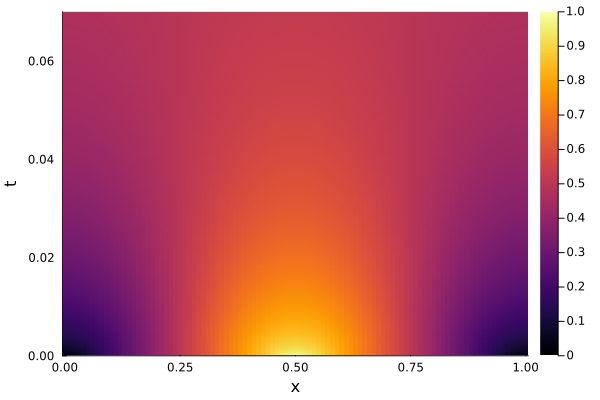

In [66]:
import Plots
Plots.heatmap(xx, tt, w', xlabel="x", ylabel="t")